In [18]:
import pandas as pd
data = pd.read_csv("/var/home/rafo/vscode02/Dataset/World_country_trade.csv")
df = data.copy()
df

,Unnamed: 0,ISO,Importers,Value imported in 2022 (USD thousand),Trade balance in 2022 (USD thousand),Annual growth in value between 2018-2022 (%),Annual growth in value between 2021-2022 (%),Share in world imports (%),Average distance of supplying countries (km),Concentration of supplying countries,Average tariff (estimated) applied by the country (%)
0,0,AF,Afghanistan,4689232,-3115279,-7.0,10.0,0.0,2277.0,0.14,8.1
1,1,AL,Albania,8407345,-4101110,10.0,9.0,0.0,1557.0,0.09,2.2
2,2,DZ,Algeria,33766897,32969278,-6.0,5.0,0.1,5034.0,0.08,14.4
3,3,AD,Andorra,1864441,-1478298,3.0,19.0,0.0,1028.0,0.45,NaN
4,4,AO,Angola,17710712,33557888,-1.0,56.0,0.1,8524.0,0.07,8.4
...,...,...,...,...,...,...,...,...,...,...,...
192,192,UZ,Uzbekistan,28264000,-12977072,11.0,19.0,0.1,3475.0,0.12,12.4
193,193,VU,Vanuatu,424720,-202207,7.0,25.0,0.0,6989.0,0.12,7.4
194,194,YE,Yemen,8985465,-7274046,8.0,8.0,0.0,6354.0,0.14,6.9
195,195,ZM,Zambia,9048377,2641355,-1.0,27.0,0.0,4526.0,0.17,10.9


In [19]:
df.drop("ISO", axis = 1, inplace=  True)

In [21]:
df = df.iloc[:,2:len(df)]
df

,Trade balance in 2022 (USD thousand),Annual growth in value between 2018-2022 (%),Annual growth in value between 2021-2022 (%),Share in world imports (%),Average distance of supplying countries (km),Concentration of supplying countries,Average tariff (estimated) applied by the country (%)
0,-3115279,-7.0,10.0,0.0,2277.0,0.14,8.1
1,-4101110,10.0,9.0,0.0,1557.0,0.09,2.2
2,32969278,-6.0,5.0,0.1,5034.0,0.08,14.4
3,-1478298,3.0,19.0,0.0,1028.0,0.45,NaN
4,33557888,-1.0,56.0,0.1,8524.0,0.07,8.4
...,...,...,...,...,...,...,...
192,-12977072,11.0,19.0,0.1,3475.0,0.12,12.4
193,-202207,7.0,25.0,0.0,6989.0,0.12,7.4
194,-7274046,8.0,8.0,0.0,6354.0,0.14,6.9
195,2641355,-1.0,27.0,0.0,4526.0,0.17,10.9


In [22]:
df.dropna(inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 196
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Trade balance in 2022 (USD thousand)                   175 non-null    int64  
 1   Annual growth in value between 2018-2022 (%)           175 non-null    float64
 2   Annual growth in value between 2021-2022 (%)           175 non-null    float64
 3   Share in world imports (%)                             175 non-null    float64
 4   Average distance of supplying countries (km)           175 non-null    float64
 5   Concentration of supplying countries                   175 non-null    float64
 6   Average tariff (estimated) applied by the country (%)  175 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 10.9 KB


In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [24]:
y = df["Trade balance in 2022 (USD thousand)"]
x = df.drop(["Trade balance in 2022 (USD thousand)"], axis = 1)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [30]:
pca = PCA()

In [31]:
x_train.isnull().sum()

Annual growth in value between 2018-2022 (%)             0
Annual growth in value between 2021-2022 (%)             0
Share in world imports (%)                               0
Average distance of supplying countries (km)             0
Concentration of supplying countries                     0
Average tariff (estimated) applied by the country (%)    0
dtype: int64

In [32]:
x_reduced_train = pca.fit_transform(scale(x_train))

In [33]:
x_reduced_train[1:10]

array([[-1.57403253, -0.87349302, -0.45394966,  0.33679321,  0.28609248,
        -0.00734556],
       [-1.700917  ,  2.23131067,  0.85963107, -0.52678939,  0.94489045,
        -0.04734255],
       [ 0.93743539, -0.91778845, -0.55139092, -0.42192561, -0.27867407,
        -0.61931092],
       [-1.43295613,  0.95465927, -0.20854182, -1.06836303,  0.94202257,
         0.49680712],
       [-1.58155426,  0.5864771 , -0.73999604, -0.75672205, -0.27665607,
         0.57429735],
       [ 0.45115693, -0.13835483, -0.08499746, -0.2600989 , -0.22173872,
        -0.29666345],
       [-0.21237   , -0.65448478,  0.23237215, -0.66564437, -0.12179471,
        -0.13745709],
       [-1.99279005, -0.76899674, -0.81141171,  1.03229901,  0.07945427,
         0.08832307],
       [-1.61918778,  0.48366406, -0.41853946, -0.58501904, -0.23020548,
         0.39205841]])

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
pcr_model = lm.fit(x_reduced_train,y_train)

Sabit

In [38]:
pcr_model.intercept_

3223505.9007633612

Modelin əmsalı,qatsaylar

In [39]:
pcr_model.coef_

array([ -7581802.94775598, -17982030.55303797,  -4481875.38974945,
        40899946.60218705,   7816386.60409518,  -9060440.76755149])

Təxmin etmə

In [44]:
y_predict = pcr_model.predict(x_reduced_train)

Train seti üçün xətanın hesablanması:

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,y_predict))

85100766.97489107

R scorun hesablanması

In [48]:
from sklearn.metrics import  r2_score
r2_score(y_train,y_predict)

0.22059138075329177

In [49]:
pca2 = PCA()
x_reduced_test = pca2.fit_transform(scale(x_test))

In [54]:
test_predict = pcr_model.predict(x_reduced_test)

Test seti üçün xəta :

In [55]:
np.sqrt(mean_squared_error(y_test,test_predict))

52453072.55912722

Model tuning/Model təsdiqləmə : Train xətası (Brutforce xətası )hesablanır sonrada matplotliblə vizualizasiya olunur: 

In [57]:
from sklearn import  model_selection
lm2 = LinearRegression()
cv = model_selection.KFold(shuffle = True, random_state = 1)

In [59]:
RMSE =[]

Brutforce üsulu

In [63]:
for i in np.arange(1,x_reduced_train.shape[1]+1):
    score = np.sqrt(-1 *model_selection.cross_val_score(lm2,x_reduced_train[:,:i],y_train.ravel(),cv = cv,scoring= "neg_mean_squared_error").mean())
    RMSE.append(score)

Text(0, 0.5, 'RMSE')

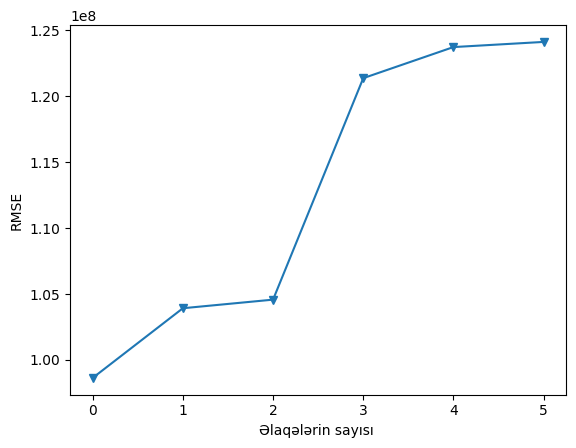

In [64]:
import matplotlib.pyplot as plt
plt.plot(RMSE,"-v")
plt.xlabel("Əlaqələrin sayısı ")
plt.ylabel("RMSE")


In [65]:
lm3 = LinearRegression()
pcr_model02= lm3.fit(x_reduced_train[:,0:3],y_train) #Vizualizasiyada  ən kiçik dəyər

In [66]:
pred03 = pcr_model02.predict(x_reduced_train[:,0:3])
print(np.sqrt(mean_squared_error(y_train,pred03)))

93511857.55843139


In [67]:
pred04 = pcr_model02.predict(x_reduced_test[:,0:3])
print(np.sqrt(mean_squared_error(y_test,pred04)))

47465004.06181725
